# Week 4 Assignment  
# Downloading Annual Reports (form 10-K) from SEC Edgar System

 More information about SEC Edgar System: https://www.sec.gov/edgar/searchedgar/accessing-edgar-data.htm

## Overview

The U.S. Securities and Exchange Commission's HTTPS file system allows comprehensive access to the SEC's EDGAR (Electronic Data Gathering, Analysis, and Retrieval system) filings by corporations, funds, and individuals. These filings are disseminated to the public through the EDGAR Dissemination Service, currently operated under contract to Attain, LLC, which markets data directly to subscribers. The dissemination stream also populates the EDGAR public database on sec.gov, which can be researched through a variety of EDGAR public searches.

One of the most import forms of public listed companies is annual report or form 10-K. Researchers and investors attach great importance to these forms. However, traditionally, they focus on the numerical part of the report, say, accounting fundamentals, and did not utilize the text (or a majority) part of the report entensively. They may read carefully for individual companies but not on a larger scale due to various reasons, one of which is the limitation of time needed to process such a huge amount of reports. With the capability of machine learning being constantly improving, we can start to dip into this field.

**This assignment is the first step in this research field, in which you will learn about the SEC Edgar system and download annual reports for companies between 2015 and 2016.**

Python libraries to be used:
+ import requests
+ from bs4 import BeautifulSoup
+ import pandas as pd
+ import os
+ import datetime

Next, let's get familiar with the Edgar system

## Using the EDGAR Index Files

Indexes to all public filings are are available from 1994Q3 through the present and located in the following browsable directories:

+ https://www.sec.gov/Archives/edgar/daily-index/ — daily index files through the current year;

+ https://www.sec.gov/Archives/edgar/full-index/ — Full indexes offer a "bridge" between quarterly and daily indexes, compiling filings from the beginning of the current quarter through the previous business day. At the end of the quarter, the full index is rolled into a static quarterly index.

### Note: In this assignment, we use daily index just for playing around, although using full index is much easier and straightforward.

The EDGAR indexes list the following information for each filing: Company Name, Form Type, CIK (Central Index Key), Date Filed, and File Name (including folder path).

Four types of indexes are available. The company, form, and master indexes contain the same information sorted differently.

+ company — sorted by company name
+ form — sorted by form type
+ master — sorted by CIK number
+ XBRL — list of submissions containing XBRL financial files, sorted by CIK number; these include Voluntary Filer Program submissions

### Note: We use form index files to find 10-K forms downloading addresses.

Here is a peek of the form index file:

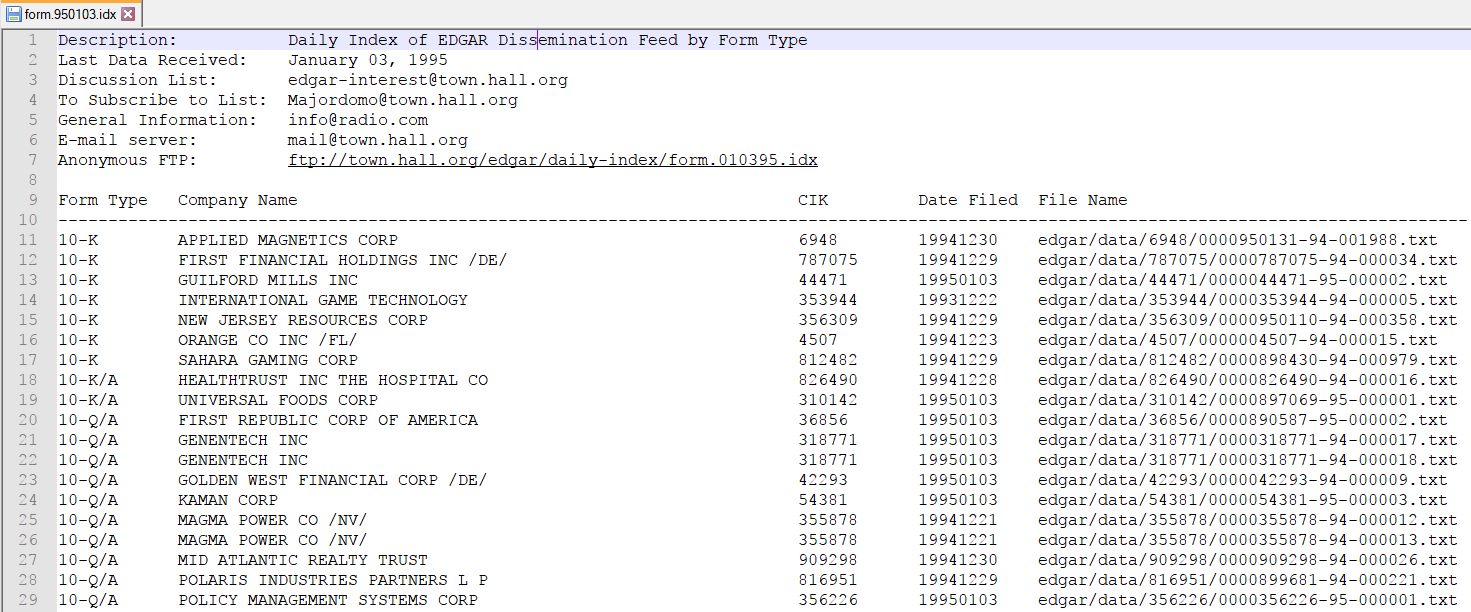



## Paths and Directory Structure

The index paths link to the raw ascii text version of the complete disseminated filing content, by adding https://www.sec.gov/Archives/ to the file_name found in the index file. for example:

https://www.sec.gov/Archives/edgar/data/6948/0000950131-94-001988.txt


### General Notes

#### Central Index Key (CIK)

The CIK is the unique numerical identifier assigned by the EDGAR system to filers when they sign up to make filings to the SEC. CIK numbers remain unique to the filer; they are not recycled.

#### Accession Number

In the example above, "0000950131-94-001988" is the "accession number," a unique identifier assigned automatically to an accepted submission by the EDGAR Filer System. The first set of numbers (0000950131) is the CIK of the entity submitting the filing. This could be the company or a third-party filer agent. Some filer agents without a regulatory requirement to make disclosure filings with the SEC have a CIK but no searchable presence in the public EDGAR database. The next 2 numbers (94) represent the year. The last series of numbers represent a sequential count of submitted filings from that CIK. The count is usually, but not always, reset to 0 at the start of each calendar year.

### Step 1: Import libraries

In [1]:
import requests
from bs4 import BeautifulSoup as bs
import os
import pandas as pd
import datetime

### Step 2: Download Edgar form index files.

In [2]:
#Set local path to save those index files. 
path='E:\\usu_classes\\fall_2019\\mis_6110_machine_learning\\assignment_4\\index\\' #replace with your own path, 
                                                       #Note: you need use '\\' or '/' to separate directories on Windows.
#Set the parent url at SEC Edgar.
url='https://www.sec.gov/Archives/edgar/daily-index/'

#### Task 1: Extract web address for the form index files between 2015 and 2016. 
We need first inspect the structure of the webpage. The url above is for dayily index, and it is organized in years and for each year it has 4 folders for 4 quaters. 
+ step 1: You need loop over years and quaters to each directory between 2011 and 2016.
+ step 2: For each directory, you need to send a request and retrieve the html using requests module.
+ Step 3: For the html you retrieved, you need use beautifulsoup module to find all 'a' tags and href links which start with 'form'. These links are the addresses where these form index are. We need these to download them later.
+ step 4: You need to stor these links to a list.

Note:
1. To request a page, you can use 
>     page=requests.get(pageurl)
2. To parse the html with bs, you can use 
>     parsed_page=BeautifulSoup(page.content,'html.parser')
3. To find all a tags and links start with 'form', you can use
>     parsed_page.find_all('a', href=lambda x: x and x.startswith('form'))
4. What you get from this page is the relative url like, , you need add the prefix to it, the prefix includes 'https://<span>www.sec.gov/Archives/edgar/daily-index/', year and quater, and then your relative url.
>     full_url=url+str(year)+str(quater)+local_url

      Make sure you add '/' in between directories


#### Type in your code below.

The results should be a list, containing all addresses for form index files, e.g.:

['https://<span></span>www.sec.gov/Archives/edgar/daily-index/1995/QTR1/form.950103.idx',

'https://<span></span>www.sec.gov/Archives/edgar/daily-index/1995/QTR1/form.950104.idx',

'https://<span></span>www.sec.gov/Archives/edgar/daily-index/1995/QTR1/form.950105.idx',

'https://<span></span>www.sec.gov/Archives/edgar/daily-index/1995/QTR1/form.950106.idx',

'https://<span></span>www.sec.gov/Archives/edgar/daily-index/1995/QTR1/form.950109.idx',

'https://<span></span>www.sec.gov/Archives/edgar/daily-index/1995/QTR1/form.950110.idx',
...
]

**You may also need to save these addresses in a file for future use.**

In [78]:
years_l = [2015, 2016]
qtr_l = ['QTR1', 'QTR2', 'QTR3', 'QTR4']
full_url_list = []
local_url_list = []

for years in years_l:
    for quarters in qtr_l:
        page=requests.get(url + str(years)+ '/' + quarters + '/')
        parsed_page=BeautifulSoup(page.content,'html.parser')
        local_link = parsed_page.find_all('a', href=lambda x: x and x.startswith('form'))
        for local_url in local_link:
            local_url = local_url.get_text()
            full_url_list.append(url + str(years)+ '/' + quarters + '/' + local_url)
            local_url_list.append(local_url)
        
    
# print(full_url_list)
print(local_url_list)


['form.20150102.idx', 'form.20150105.idx', 'form.20150106.idx', 'form.20150107.idx', 'form.20150108.idx', 'form.20150109.idx', 'form.20150112.idx', 'form.20150113.idx', 'form.20150114.idx', 'form.20150115.idx', 'form.20150116.idx', 'form.20150120.idx', 'form.20150121.idx', 'form.20150122.idx', 'form.20150123.idx', 'form.20150126.idx', 'form.20150127.idx', 'form.20150128.idx', 'form.20150129.idx', 'form.20150130.idx', 'form.20150202.idx', 'form.20150203.idx', 'form.20150204.idx', 'form.20150205.idx', 'form.20150206.idx', 'form.20150209.idx', 'form.20150210.idx', 'form.20150211.idx', 'form.20150212.idx', 'form.20150213.idx', 'form.20150217.idx', 'form.20150218.idx', 'form.20150219.idx', 'form.20150220.idx', 'form.20150223.idx', 'form.20150224.idx', 'form.20150225.idx', 'form.20150226.idx', 'form.20150227.idx', 'form.20150302.idx', 'form.20150303.idx', 'form.20150304.idx', 'form.20150305.idx', 'form.20150306.idx', 'form.20150309.idx', 'form.20150310.idx', 'form.20150311.idx', 'form.201503

#### Task 2: Download the form index files

You need loop over the addresses list and download each single index file to you local drive.
1. First you need send request to retrieve the file.
>     form_file=requests.get(url_of_the file)
2. Save all files to a local drive free of other files, use 'with open() as'
>     with open('path and file name of the index file', 'wb') as f:
>         f.write(form_file.content)

The benefit of using 'with open' is that it is more efficient in code writting and makes sure it closes when you are done. It is the same as:
>     f=open('path and file name of the index file', 'wb')
>     f.write(form_file.content)
>     f.close()

#### Type in your code below.

After downloading, check the number of url address in your list and the number of files you have downloaded.

Depending on your internet speed, it may takes 10s of minutes or hours to download all.

In [87]:
counter = 0

for link in full_url_list:
    form_file=requests.get(link)
    
    with open(path + local_url_list[counter], 'wb') as f:
        f.write(form_file.content)
    
    print(local_url_list[counter], 'Success', counter)
    
    counter += 1

form.20150102.idx Success 0
form.20150105.idx Success 1
form.20150106.idx Success 2
form.20150107.idx Success 3
form.20150108.idx Success 4
form.20150109.idx Success 5
form.20150112.idx Success 6
form.20150113.idx Success 7
form.20150114.idx Success 8
form.20150115.idx Success 9
form.20150116.idx Success 10
form.20150120.idx Success 11
form.20150121.idx Success 12
form.20150122.idx Success 13
form.20150123.idx Success 14
form.20150126.idx Success 15
form.20150127.idx Success 16
form.20150128.idx Success 17
form.20150129.idx Success 18
form.20150130.idx Success 19
form.20150202.idx Success 20
form.20150203.idx Success 21
form.20150204.idx Success 22
form.20150205.idx Success 23
form.20150206.idx Success 24
form.20150209.idx Success 25
form.20150210.idx Success 26
form.20150211.idx Success 27
form.20150212.idx Success 28
form.20150213.idx Success 29
form.20150217.idx Success 30
form.20150218.idx Success 31
form.20150219.idx Success 32
form.20150220.idx Success 33
form.20150223.idx Succes

form.20160210.idx Success 277
form.20160211.idx Success 278
form.20160212.idx Success 279
form.20160216.idx Success 280
form.20160217.idx Success 281
form.20160218.idx Success 282
form.20160219.idx Success 283
form.20160222.idx Success 284
form.20160223.idx Success 285
form.20160224.idx Success 286
form.20160225.idx Success 287
form.20160226.idx Success 288
form.20160229.idx Success 289
form.20160301.idx Success 290
form.20160302.idx Success 291
form.20160303.idx Success 292
form.20160304.idx Success 293
form.20160307.idx Success 294
form.20160308.idx Success 295
form.20160309.idx Success 296
form.20160310.idx Success 297
form.20160311.idx Success 298
form.20160314.idx Success 299
form.20160315.idx Success 300
form.20160316.idx Success 301
form.20160317.idx Success 302
form.20160318.idx Success 303
form.20160321.idx Success 304
form.20160322.idx Success 305
form.20160323.idx Success 306
form.20160324.idx Success 307
form.20160325.idx Success 308
form.20160328.idx Success 309
form.20160

### Step 3: Read in form index files and parse them, so that you can extract all 10-K form url addresses

You can get all file names using code below, this a safer way than read from the list above, because some files may not be downloaded sucessfuly.

In [3]:
file_path=path #replace with your path
filenames=os.listdir(file_path)#The result is a list of filenames without path.

Let's inspect a .idx file again and develop strategy to parse it and get 10 k form url addresses.

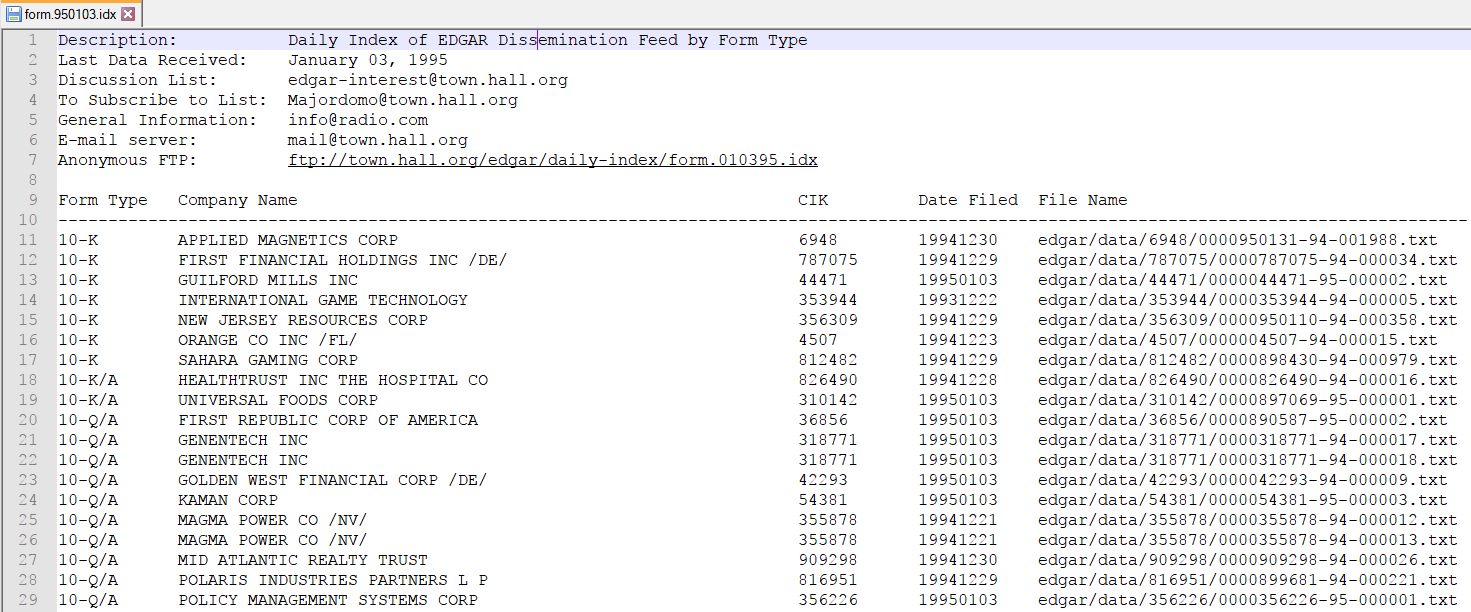


The first 7 lines are the header of the file, containing description of the file.
The ninth line is the column name and 10th line is the divider '----'.
Our index data start at line 11 (**Check your index file and the starting line**), and the columns are in fixed width. There are many ways to read in this type of file. You can google "python read in fixed width text file" and find different solutions.
I suggest you to use pandas read_fwf(), as it can take in data and store them in DataFrame, makes it easier to manipulate later.

### Task 3: Read [pandas.read_fwf() documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_fwf.html) and try to parse a single .idx file first. 

**When you stuck here, try to google for solutions first, then maybe ask classmates on weekly discussion, and the instructor is you last resort.**

+ First pick one .idx file to try.
+ Open with pandas.read_fwf(), here are a couple things or arguments you need to pass to this method.
  1. file path and name
  2. column names in list
  3. how many lines or rows you want to be skipped before reading in the actual data.
  
      **Please note, files may be different, in some files the data starts at line 10, others start at line 11, Welcome to the Real World! You need think a way out.**
      
      **Addtional note: in 2015 and 2016, there is not the issue, I used to ask students to download from 1994.**
      
  4. column width, how do you deal with it, let the method to infer itself or you specify it.
  5. it can actually read both .idx and .gz file, you may need to set condition to read both types of files later.

### Type in your code to parse a single file below.

In [29]:
df = pd.read_fwf(path+filenames[0], 
                 names=['form_type', 'company_name', 'cik', 'date_filed', 'file_name'], 
                 skiprows=11)

df.head(10)

,form_type,company_name,cik,date_filed,file_name
0,1-A,BUFFALO FORKLIFT HOLDINGS LLC,1629651,20141219,edgar/data/1629651/9999999997-15-000004.txt
1,1-A/A,"GroundFloor Real Estate, LLC",1614171,20141219,edgar/data/1614171/9999999997-15-000011.txt
2,10-12G/A,"BRAC Global Automotive, Inc.",1624477,20150102,edgar/data/1624477/0001594062-14-000398.txt
3,10-12G/A,Nascent Biotech Inc.,1622057,20150102,edgar/data/1622057/0001477932-15-000012.txt
4,10-D,WFRBS COMMERCIAL MORTGAGE TRUST 2012-C8,1553817,20150102,edgar/data/1553817/0001056404-15-000018.txt
5,10-D,WFRBS COMMERCIAL MORTGAGE TRUST 2013-C12,1569414,20150102,edgar/data/1569414/0001056404-15-000024.txt
6,10-D,WFRBS Commercial Mortgage Trust 2011-C5,1532826,20150102,edgar/data/1532826/0001056404-15-000003.txt
7,10-D,WFRBS Commercial Mortgage Trust 2012-C10,1561726,20150102,edgar/data/1561726/0001056404-15-000021.txt
8,10-D,WFRBS Commercial Mortgage Trust 2012-C6,1542830,20150102,edgar/data/1542830/0001056404-15-000013.txt
9,10-D,WFRBS Commercial Mortgage Trust 2013-C14,1576047,20150102,edgar/data/1576047/0001056404-15-000028.txt


#### When you successfuly read in and parsed the file, you should have a pandas dataframe containing all rows of data.

The dataframe should look like:

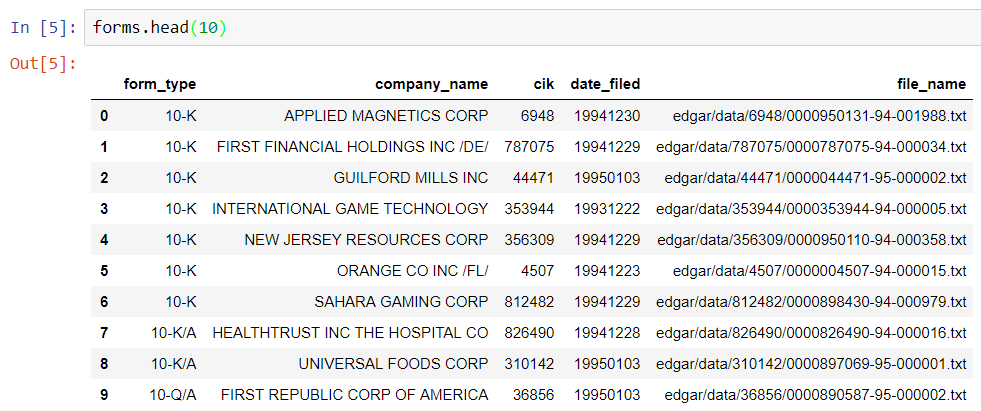

In [30]:
tenk_path = 'E:\\usu_classes\\fall_2019\\mis_6110_machine_learning\\assignment_4\\10-k_directory\\'

tenk_df = df[df.form_type =='10-K']
tenk_df.to_csv(tenk_path + 'tenk.csv')
tenk_df

,form_type,company_name,cik,date_filed,file_name
20,10-K,Hygea Holdings Corp.,1469628,20150102,edgar/data/1469628/0001615774-15-000013.txt
21,10-K,"TURBODYNE TECHNOLOGIES, INC",1022097,20150102,edgar/data/1022097/0001477932-15-000006.txt


#### Next, filter the dataframe and select only 10-K forms, this can be done very easily in pandas, refer to pandas review, if you have questions.

I suggest you to save the dataframe into .csv file for future use, because you may need days to complete the whole assignment.
To save to csv, you could use
>    form10ks.to_csv('your file name and path')


### Task 4: Read in and parse all index files.
#### After you have successfully processed a single file, you need to apply the same trick on all .idx or .idx.gz files.
+ You need to loop over all the filenames and open one at a time
+ Parse it like above, store it in a dataframe
+ select only 10-K forms
+ read in and parse the next file
+ append the 10-k forms dataframe to the dataframe resulting from previous file 
+ keep doing until all files are read or errors are raised, :-)
+ save the final dataframe in a .csv file for future use

**Note:** 
+ **Many unexpected errors or exceptions may araise, keep cool and calm, solve them one by one, google it, in the real world, you may deal with far more complex problems.**

#### Type your code below.

The result should be a dataframe containing all the 10-k forms urls submitted to SEC Edgar system between 2011 and 2016.

In [18]:
all_df = []

for filename in filenames:
    df = pd.read_fwf(path+filename, 
                 names=['form_type', 'company_name', 'cik', 'date_filed', 'file_name'], 
                 skiprows=11)
    df = df[df.form_type =='10-K']
    all_df.append(df)
    
    
frame = pd.concat(all_df, axis=0, ignore_index=True)

tenk_url_fp = 'E:\\usu_classes\\fall_2019\\mis_6110_machine_learning\\assignment_4\\10-k_url\\'
frame.to_csv(tenk_url_fp + '10kurl.csv')
print(frame)

     form_type                                 company_name      cik  \
0         10-K                         Hygea Holdings Corp.  1469628   
1         10-K                  TURBODYNE TECHNOLOGIES, INC  1022097   
2         10-K     American Nano Silicon Technologies, Inc.  1415917   
3         10-K                          JunkieDog.com, Inc.  1514113   
4         10-K                          Pleasant Kids, Inc.  1424657   
5         10-K                             ACTIVECARE, INC.  1429896   
6         10-K             ADVANCED CREDIT TECHNOLOGIES INC  1437517   
7         10-K                        ALTEROLA BIOTECH INC.  1442999   
8         10-K               AMERICAN SOIL TECHNOLOGIES INC  1031896   
9         10-K           Accelerated Acquisition XVII, Inc.  1534629   
10        10-K               BIO REFERENCE LABORATORIES INC   792641   
11        10-K                            BLUE SPHERE CORP.  1419582   
12        10-K                         CASPIAN SERVICES INC  109

### Step 4: Download all 10-k forms between 2015 and 2016.

Should we go ahead and pull all the urls and use requests module to download all these files?

Oh, please wait! Don't hop on too fast. 

When you are going to loop on a large amount of something, especially downloading, you need think before act.

+ Double check your urls, are there any mistakes, are all of them 10-k forms? Do you add the url prefix correctly?
+ Are there any duplicates in urls? This is really important, because it may increase your download time greatly and waste your time.
+ Again, try to first download say, 5 files in your looped code, to see if there are any problems with your looping code, and hand record how much time for these files to be downloaded.
+ Based on the trial, calculate roughly on average how much time it takes to download one file and then how much time you need to download all the files. You may find it could take days to download all the files, so you need to plan to divid the job into smaller chunks and find (night) time to download them.
+ You may also need to set a counter or something to make sure you know where it stops if there is an exception raised and then continue to download the rest.

#### Tips:
+ Try download a 10-k form first 

>    securl='https://<span></span>www.sec.gov/Archives/'

>    url='edgar/data/1086139/0001144204-06-055136.txt'

>    form10k=requests.get(securl+url)

+ Use pandas .drop_duplicates() to drop duplicates if any

>    no_duplicates=form10ks.drop_duplicates()


### Type your code below.

How many files you have downloaded and how much time it takes?

## Warning: You should reserve 120G to 150G space on your storage device.

In [5]:
securl='https://www.sec.gov/Archives/'
# tenk_url='edgar/data/1086139/0001144204-06-055136.txt'
tenk_dl_fp = 'E:\\usu_classes\\fall_2019\\mis_6110_machine_learning\\assignment_4\\10k_download\\'
tenk_url_fp = 'E:\\usu_classes\\fall_2019\\mis_6110_machine_learning\\assignment_4\\10-k_url\\'

df_tenk = pd.read_csv(tenk_url_fp + '10kurl.csv')

no_duplicates = df_tenk.drop_duplicates()

ctr = 8813



for file in no_duplicates['file_name'][8813:]:
    
    try:
        form10k=requests.get(securl+file)

        with open(tenk_dl_fp + f'{ctr}.txt', 'wb') as f:
            f.write(form10k.content)

        print(f'Success {ctr} {file}')
        ctr += 1
    except Exception as e:
        print(e + str(ctr))
        ctr += 1
        continue


# First run ended on 3221
# 2nd run ended on 8812
# I downloaded 9,617 files and it took around 4 hours


Success 8813 edgar/data/1514994/0001096906-16-001716.txt
Success 8814 edgar/data/1592407/0001144204-16-110285.txt
Success 8815 edgar/data/1328792/0000950159-16-000639.txt
Success 8816 edgar/data/1445541/0001552781-16-001793.txt
Success 8817 edgar/data/1334589/0001393905-16-000960.txt
Success 8818 edgar/data/882291/0001019687-16-006800.txt
Success 8819 edgar/data/353184/0001437749-16-034573.txt
Success 8820 edgar/data/880555/0000880555-16-000055.txt
Success 8821 edgar/data/794619/0000794619-16-000374.txt
Success 8822 edgar/data/1368622/0001558370-16-006514.txt
Success 8823 edgar/data/1584754/0001615774-16-006132.txt
Success 8824 edgar/data/1083446/0001144204-16-110594.txt
Success 8825 edgar/data/1634117/0001634117-16-000082.txt
Success 8826 edgar/data/847464/0001096906-16-001729.txt
Success 8827 edgar/data/1182737/0001078782-16-003042.txt
Success 8828 edgar/data/1611852/0001213900-16-014586.txt
Success 8829 edgar/data/1577603/0001437749-16-034610.txt
Success 8830 edgar/data/1567520/0001

Success 8958 edgar/data/1262976/0001262976-16-000073.txt
Success 8959 edgar/data/1491525/0001065949-16-000474.txt
Success 8960 edgar/data/743316/0000743316-16-000081.txt
Success 8961 edgar/data/1564708/0001193125-16-679975.txt
Success 8962 edgar/data/1591698/0001104659-16-139345.txt
Success 8963 edgar/data/1555972/0001144204-16-118840.txt
Success 8964 edgar/data/1605810/0001605810-16-000020.txt
Success 8965 edgar/data/1490054/0001445866-16-002519.txt
Success 8966 edgar/data/1365784/0001393905-16-001012.txt
Success 8967 edgar/data/95052/0001193125-16-681445.txt
Success 8968 edgar/data/1552358/0001494733-16-000167.txt
Success 8969 edgar/data/1093248/0001493152-16-012468.txt
Success 8970 edgar/data/1436126/0001436126-16-000062.txt
Success 8971 edgar/data/1615942/0001493152-16-012455.txt
Success 8972 edgar/data/1134982/0001213900-16-015950.txt
Success 8973 edgar/data/1079297/0001213900-16-015982.txt
Success 8974 edgar/data/68270/0001437749-16-037460.txt
Success 8975 edgar/data/1077638/0001

Success 9103 edgar/data/1096132/0001262463-16-001035.txt
Success 9104 edgar/data/1553643/0001213900-16-016664.txt
Success 9105 edgar/data/72444/0001437749-16-038645.txt
Success 9106 edgar/data/865941/0001008886-16-000363.txt
Success 9107 edgar/data/1394638/0001553350-16-002465.txt
Success 9108 edgar/data/1493712/0001594062-16-000604.txt
Success 9109 edgar/data/1355250/0001477932-16-012448.txt
Success 9110 edgar/data/1459482/0001683168-16-000086.txt
Success 9111 edgar/data/1498382/0001213900-16-016715.txt
Success 9112 edgar/data/1066194/0001558370-16-008328.txt
Success 9113 edgar/data/1448558/0001445866-16-002618.txt
Success 9114 edgar/data/1350421/0001078782-16-003465.txt
Success 9115 edgar/data/1538263/0001538263-16-000128.txt
Success 9116 edgar/data/1434601/0001391609-16-000559.txt
Success 9117 edgar/data/811831/0001437749-16-038610.txt
Success 9118 edgar/data/1483195/0001483195-16-000041.txt
Success 9119 edgar/data/1530981/0001683168-16-000094.txt
Success 9120 edgar/data/1171155/000

Success 9248 edgar/data/1385544/0001193125-16-725704.txt
Success 9249 edgar/data/1375063/0001171843-16-012314.txt
Success 9250 edgar/data/1404079/0001144204-16-125883.txt
Success 9251 edgar/data/1623554/0001493152-16-013701.txt
Success 9252 edgar/data/1510963/0001510963-16-000050.txt
Success 9253 edgar/data/1510963/0001510963-16-000062.txt
Success 9254 edgar/data/1619055/0001477932-16-012801.txt
Success 9255 edgar/data/1517498/0001477932-16-012793.txt
Success 9256 edgar/data/1670869/0001663577-16-000330.txt
Success 9257 edgar/data/1060426/0001096906-16-001934.txt
Success 9258 edgar/data/28561/0001654954-16-002650.txt
Success 9259 edgar/data/1526689/0001493152-16-013869.txt
Success 9260 edgar/data/1526689/0001640334-16-001762.txt
Success 9261 edgar/data/1422768/0001640334-16-001777.txt
Success 9262 edgar/data/1324772/0001628280-16-019998.txt
Success 9263 edgar/data/857949/0001213900-16-017365.txt
Success 9264 edgar/data/1463959/0001214659-16-014024.txt
Success 9265 edgar/data/1581545/00

Success 9393 edgar/data/70145/0000070145-16-000173.txt
Success 9394 edgar/data/1409432/0001551163-16-000527.txt
Success 9395 edgar/data/785786/0000785786-16-000110.txt
Success 9396 edgar/data/857005/0000857005-16-000071.txt
Success 9397 edgar/data/1624140/0001477932-16-013641.txt
Success 9398 edgar/data/1530950/0001530950-16-000508.txt
Success 9399 edgar/data/1598683/0001477932-16-013670.txt
Success 9400 edgar/data/897723/0000897723-16-000049.txt
Success 9401 edgar/data/829224/0000829224-16-000083.txt
Success 9402 edgar/data/1173431/0001173431-16-000429.txt
Success 9403 edgar/data/865436/0000865436-16-000366.txt
Success 9404 edgar/data/932628/0000932628-16-000045.txt
Success 9405 edgar/data/1140859/0001140859-16-000022.txt
Success 9406 edgar/data/6281/0000006281-16-000097.txt
Success 9407 edgar/data/1124941/0001144204-16-135949.txt
Success 9408 edgar/data/1484769/0001493152-16-015404.txt
Success 9409 edgar/data/26076/0001558370-16-010242.txt
Success 9410 edgar/data/1352081/0001352081-1

Success 9539 edgar/data/315189/0001047469-16-017244.txt
Success 9540 edgar/data/27673/0001558370-16-010562.txt
Success 9541 edgar/data/1609472/0001520138-16-001306.txt
Success 9542 edgar/data/1601046/0001601046-16-000077.txt
Success 9543 edgar/data/1216752/0001216752-16-000055.txt
Success 9544 edgar/data/216877/0001513162-16-001108.txt
Success 9545 edgar/data/1674910/0001674910-16-000004.txt
Success 9546 edgar/data/1261734/0001199073-16-000300.txt
Success 9547 edgar/data/1090872/0001090872-16-000082.txt
Success 9548 edgar/data/10048/0000010048-16-000021.txt
Success 9549 edgar/data/1594337/0001558370-16-010582.txt
Success 9550 edgar/data/357294/0001437749-16-043587.txt
Success 9551 edgar/data/1205181/0001493152-16-016047.txt
Success 9552 edgar/data/808450/0000808450-16-000140.txt
Success 9553 edgar/data/1000230/0001437749-16-043579.txt
Success 9554 edgar/data/1288750/0001052918-16-001454.txt
Success 9555 edgar/data/1045942/0001654954-16-005033.txt
Success 9556 edgar/data/102741/00001027